# <font color=red> The goal of this project is use machine learning to create a model that predicts which passengers survived the Titanic shipwreck </font>

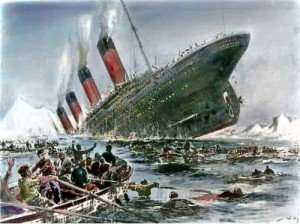

In [108]:
from IPython.display import Image
Image("titanic.jpg")

In [109]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [110]:
#Importing dataset
df= pd.read_csv("titanic.csv")

## 1. Exploratory Data Analysis

In [111]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## <font color=black> Variable Description </font>
- PassengerId: <font color=black> passenger's **ID** </font> 
- Survived: <font color=black> **0** </font>= No, <font color=black> **1** </font>= Yes
- PClass: Passenger Class=<font color=black> (1=**1st**. 2=**2nd**,3=**3rd**) </font>
- Name: <font color=black> passenger's **name** </font> 
- Sex: <font color=black> passenger's **sex** </font> 
- Age: <font color=black> passenger's **age** </font> 
- SibSp: <font color=black> **number** of Siblings/Spouses Aboard </font> 
- Parch: <font color=black> **number** of Parents/Children Aboard </font>
- Ticket: <font color=black> **Ticket number** </font> 
- Fare: <font color=black> **Passenger Fare** (British pound) </font> 
- Cabin: <font color=black> **Cabin ID** </font> 
- Embarked: <font color=black> **Port of Embarkation** </font> C=Cherbourg, Q=Queenstown, S=Southampton

In [112]:
df.shape

(891, 12)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [114]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Data Visualization

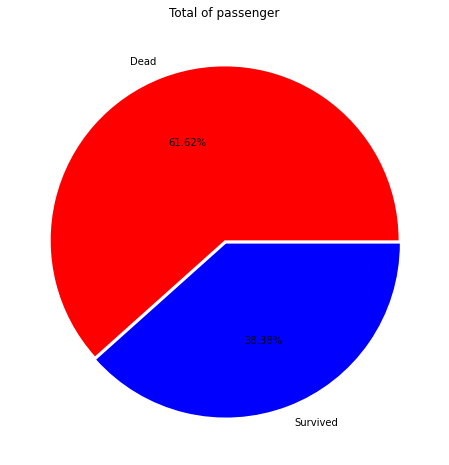

In [115]:
#Survived and dead
plt.figure(figsize=(8,8))
plt.pie(df["Survived"].value_counts(), colors=["red", "blue"], labels=["Dead","Survived"], autopct='%.2f%%', explode=[0,0.02] )
plt.title("Total of passenger");

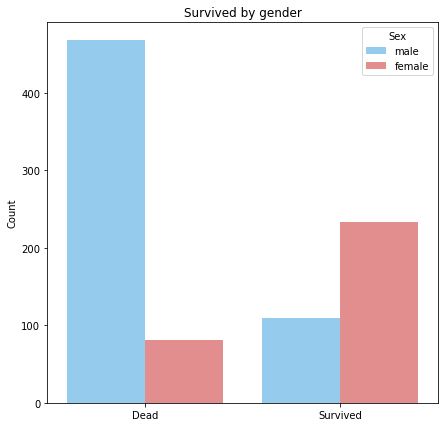

In [116]:
#Gender analysis
plt.figure(figsize=(7,7))
gender_colors = ['lightskyblue', 'lightcoral']
plt.title("Survived by gender")
x=sns.countplot(data=df, x="Survived", hue='Sex', palette=gender_colors)
plt.xticks([0,1],["Dead", "Survived"])
x.set(xlabel=None, ylabel="Count");

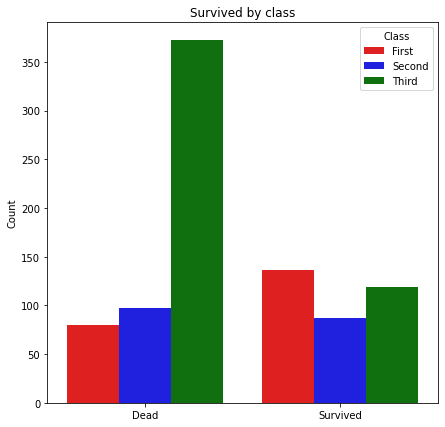

In [117]:
#Class Analysis
plt.figure(figsize=(7,7))
colors = ['red', 'blue', 'green']
plt.title("Survived by class")
y=sns.countplot(data=df, x="Survived", hue='Pclass', palette=colors)
plt.xticks([0,1],["Dead", "Survived"])
plt.legend(title="Class", loc="upper right", labels=["First","Second", "Third"])
y.set(xlabel=None,ylabel="Count");

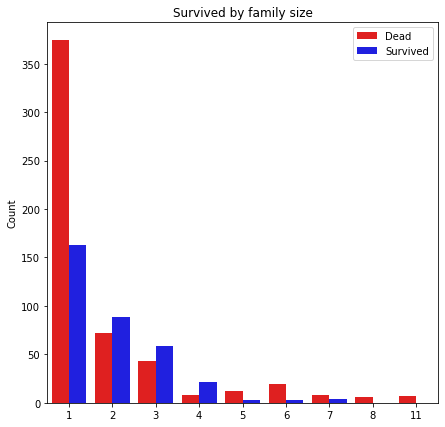

In [118]:
#Family size analysis
df["Family_size"]=df['SibSp']+df['Parch']+1
f_colors = ['red', 'blue']
plt.figure(figsize=(7,7))
plt.title("Survived by family size")
y=sns.countplot(data=df, x="Family_size", hue='Survived', palette=f_colors)
plt.legend(loc="upper right", labels=["Dead","Survived"])
y.set(xlabel=None,ylabel="Count");

In [119]:
df.drop(["Family_size"], axis=1, inplace=True)

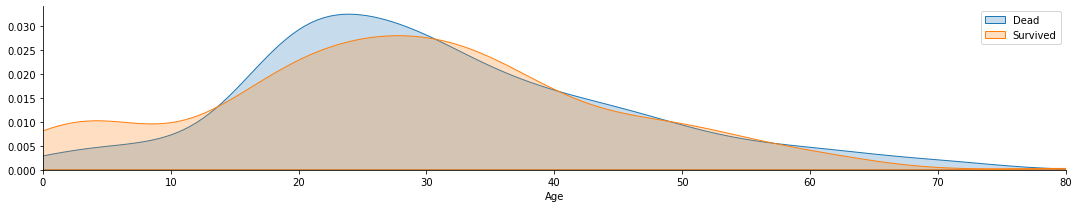

In [120]:
#Age analysis
facet = sns.FacetGrid(df, hue="Survived", aspect=5)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, df["Age"].max()))
plt.legend(loc="upper right", labels=["Dead","Survived"]);

## 3. Data Preprocessing

In [121]:
#Removal non-significant variables
df.drop(["PassengerId","Name","Ticket","Cabin"], axis=1, inplace=True)

In [122]:
#Checking for null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [123]:
#Fill the null values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode() [0], inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [124]:
#Convert categorical data into numerical data.

In [125]:
df = pd.get_dummies(df, columns=['Sex','Embarked','Pclass'],drop_first=True)

In [126]:
#Variable standardization

In [127]:
mms = MinMaxScaler()
df[['Age','Fare']] = mms.fit_transform(df[['Age','Fare']])

In [128]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,0.271174,1,0,0.014151,1,0,1,0,1
1,1,0.472229,1,0,0.139136,0,0,0,0,0
2,1,0.321438,0,0,0.015469,0,0,1,0,1
3,1,0.434531,1,0,0.103644,0,0,1,0,0
4,0,0.434531,0,0,0.015713,1,0,1,0,1


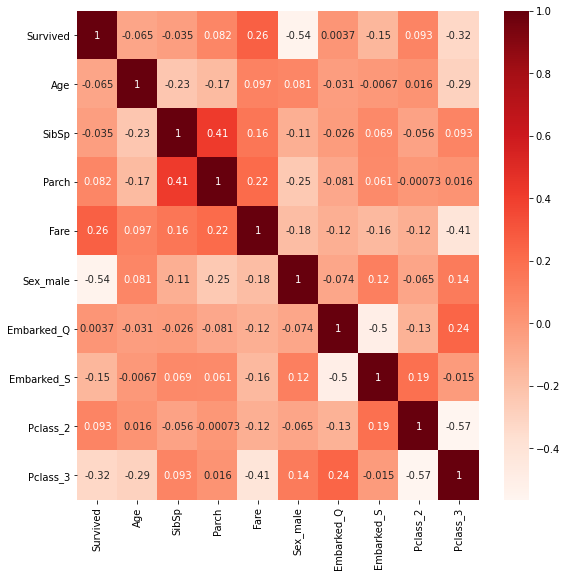

In [129]:
#Plotting Heatmap
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, cmap="Reds");

In [130]:
#Splitting The Data into Training And Testing Dataset
train, test = train_test_split(df, test_size = 0.3)
print(train.shape)
print(test.shape)

(623, 10)
(268, 10)


In [131]:
train_X=train.loc[:, train.columns != 'Survived'] #taking the training data features
train_Y= train.Survived #output of training data
test_X=test.loc[:, test.columns != 'Survived'] #taking test data features
test_Y= test.Survived #output of training data     

## 4. Building Models

### <font color=blue> 4.1 Logistic Regression </font>

In [132]:
models={}
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
result=metrics.accuracy_score(prediction,test_Y)
LR = {'LR':result}
models.update(LR)

In [133]:
#Confusion Matrix
print(confusion_matrix(prediction,test_Y))

[[145  31]
 [ 20  72]]


In [134]:
#Classification Report
print(classification_report(prediction,test_Y))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       176
           1       0.70      0.78      0.74        92

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.79       268
weighted avg       0.82      0.81      0.81       268



### <font color=blue> 4.2 K-Nearest Neighbours </font>

In [135]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
result=metrics.accuracy_score(prediction,test_Y)
KNN = {'KNN':result}
models.update(KNN)

In [136]:
#Confusion Matrix
print(confusion_matrix(prediction,test_Y))

[[143  25]
 [ 22  78]]


In [137]:
#Classification Report
print(classification_report(prediction,test_Y))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       168
           1       0.76      0.78      0.77       100

    accuracy                           0.82       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.83      0.82      0.83       268



### <font color=blue> 4.3 Support Vector Machine </font>

In [138]:
model=svm.SVC()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
result=metrics.accuracy_score(prediction,test_Y)
SVM = {'SVM':result}
models.update(SVM)

In [139]:
#Confusion Matrix
print(confusion_matrix(prediction,test_Y))

[[145  30]
 [ 20  73]]


In [140]:
#Classification Report
print(classification_report(prediction,test_Y))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       175
           1       0.71      0.78      0.74        93

    accuracy                           0.81       268
   macro avg       0.79      0.81      0.80       268
weighted avg       0.82      0.81      0.82       268



### <font color=blue> 4.4 GaussianNB </font>

In [141]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
result=metrics.accuracy_score(prediction,test_Y)
GNB = {'GNB':result}
models.update(GNB)

In [142]:
#Confusion Matrix
print(confusion_matrix(prediction,test_Y))

[[142  34]
 [ 23  69]]


In [143]:
#Classification Report
print(classification_report(prediction,test_Y))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       176
           1       0.67      0.75      0.71        92

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.77       268
weighted avg       0.80      0.79      0.79       268



### <font color=blue> 4.5 Decision tree </font>

In [144]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
result=metrics.accuracy_score(prediction,test_Y)
DT = {'DT':result}
models.update(DT)

In [145]:
#Confusion Matrix
print(confusion_matrix(prediction,test_Y))

[[141  28]
 [ 24  75]]


In [146]:
#Classification Report
print(classification_report(prediction,test_Y))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       169
           1       0.73      0.76      0.74        99

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.79       268
weighted avg       0.81      0.81      0.81       268



In [147]:
for key, value in models.items():
    print(key, ' : ', round(value,3))

LR  :  0.81
KNN  :  0.825
SVM  :  0.813
GNB  :  0.787
DT  :  0.806


### <font color=red> As we can see, the best model for this dataset is Support Vector Machine, with 0.825 accuracy </font> 

### :)